# **DenseNet121**

In [ ]:
!pip install ipython-autotime
get_ipython().run_line_magic('load_ext', 'autotime')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 20.2 MB/s 
time: 554 µs (started: 2022-12-06 21:59:54 +00:00)


# Data Aquisition: DiBAS Dataset

In [ ]:
!git clone https://github.com/YuandiWu/DiBAS-Images.git

Cloning into 'DiBAS-Images'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 803 (delta 8), reused 177 (delta 0), pack-reused 584
Receiving objects: 100% (803/803), 4.15 GiB | 16.16 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Checking out files: 100% (690/690), done.
time: 6min 22s (started: 2022-12-06 21:59:54 +00:00)


In [ ]:
!ls DiBAS-Images/train

Acinetobacter.baumanii	   Lactobacillus.plantarum
Actinomyces.israeli	   Lactobacillus.reuteri
Bacteroides.fragilis	   Lactobacillus.rhamnosus
Bifidobacterium.spp	   Lactobacillus.salivarius
Candida.albicans	   Listeria.monocytogenes
Clostridium.perfringens    Micrococcus.spp
Enterococcus.faecalis	   Neisseria.gonorrhoeae
Enterococcus.faecium	   Porfyromonas.gingivalis
Escherichia.coli	   Propionibacterium.acnes
Fusobacterium		   Proteus
Lactobacillus.casei	   Pseudomonas.aeruginosa
Lactobacillus.crispatus    Staphylococcus.aureus
Lactobacillus.delbrueckii  Staphylococcus.epidermidis
Lactobacillus.gasseri	   Staphylococcus.saprophiticus
Lactobacillus.jehnsenii    Streptococcus.agalactiae
Lactobacillus.johnsonii    Veionella
Lactobacillus.paracasei
time: 112 ms (started: 2022-12-06 22:06:16 +00:00)


# Library Imports

In [ ]:
get_ipython().run_line_magic('unload_ext', 'autotime')
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

# Data Pre-processsing and augmentation

In [ ]:
get_ipython().run_line_magic('load_ext', 'autotime')
original_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
original = datasets.ImageFolder("DiBAS-Images/train", transform=original_transform)

time: 8.97 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform1 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment1 = datasets.ImageFolder("DiBAS-Images/train", transform=transform1)

time: 7.79 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform2 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment2 = datasets.ImageFolder("DiBAS-Images/train", transform=transform2)

time: 7.64 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform3 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment3 = datasets.ImageFolder("DiBAS-Images/train", transform=transform3)

time: 8.13 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform4 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment4 = datasets.ImageFolder("DiBAS-Images/train", transform=transform4)

time: 10.3 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform5 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAutocontrast(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment5 = datasets.ImageFolder("DiBAS-Images/train", transform=transform5)

time: 7.32 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform6 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomEqualize(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment6 = datasets.ImageFolder("DiBAS-Images/train", transform=transform6)

time: 7.05 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
transform7 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomInvert(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment7 = datasets.ImageFolder("DiBAS-Images/train", transform=transform7)

time: 6.57 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
combined_dataset = torch.utils.data.ConcatDataset((original, augment1, augment2, augment3, augment4, augment5, augment6, augment7))

time: 718 µs (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
def training_test_split(dataset, test_split=0.2):
    train_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    training_dataset = torch.utils.data.Subset(dataset, train_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return training_dataset, test_dataset

time: 916 µs (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
def test_validation_split(dataset, test_split=0.5):
    validation_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    validation_dataset = torch.utils.data.Subset(dataset, validation_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return validation_dataset, test_dataset

time: 668 µs (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
training_dataset, test_dataset = training_test_split(combined_dataset)
validation_dataset, test_dataset = test_validation_split(test_dataset)

time: 6.99 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

time: 8 ms (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
def convert_to_image(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  return image

time: 782 µs (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
classes = ["Acinetobacter.baumanii", "Actinomyces.israeli","Bacteroides.fragilis", "Bifidobacterium.spp",
           "Candida.albicans", "Clostridium.perfringens", "Enterococcus.faecalis", "Enterococcus.faecium",
           "Escherichia.coli", "Fusobacterium", "Lactobacillus.casei", "Lactobacillus.crispatus", "Lactobacillus.delbrueckii",
           "Lactobacillus.gasseri", "Lactobacillus.jehnsenii", "Lactobacillus.johnsonii", "Lactobacillus.paracasei",
           "Lactobacillus.plantarum", "Lactobacillus.reuteri", "Lactobacillus.rhamnosus", "Lactobacillus.salivarius",
           "Listeria.monocytogenes", "Micrococcus.spp", "Neisseria.gonorrhoeae", "Porfyromonas.gingivalis",
           "Propionibacterium.acnes", "Proteus", "Pseudomonas.aeruginosa", "Staphylococcus.aureus", "Staphylococcus.epidermidis",
           "Staphylococcus.saprophiticus", "Streptococcus.agalactiae", "Veionella"]

time: 826 µs (started: 2022-12-06 22:06:20 +00:00)


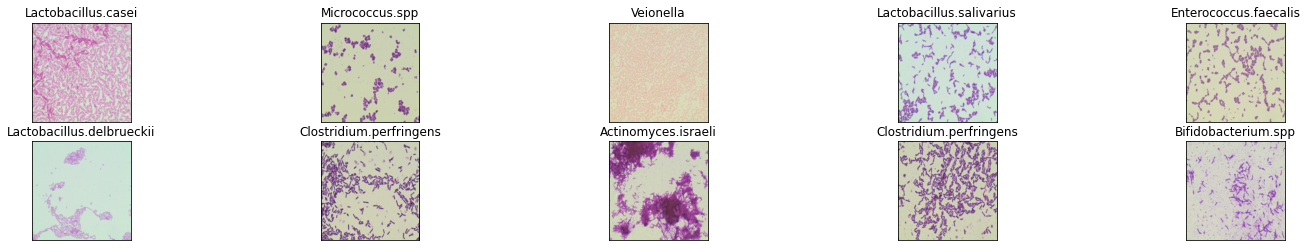

time: 4.46 s (started: 2022-12-06 22:06:20 +00:00)


In [ ]:
original_loader = torch.utils.data.DataLoader(dataset=original, batch_size=64, shuffle=True)
dataset_iterable = iter(original_loader)
images, labels = next(dataset_iterable)
fig = plt.figure(figsize=(25,4))
for i in np.arange(10): #showing sample of 16 images
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[i]))
  ax.set_title(classes[labels[i].item()])

# Neural Network Construction

In [ ]:
get_ipython().run_line_magic('unload_ext', 'autotime')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # use gpu for accelerated computation

In [ ]:
model = models.densenet121(pretrained=True) #pretrained model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
model.classifier = nn.Sequential(nn.Dropout(p=0.5, inplace=False),
                                 nn.Linear(1024,1000),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5, inplace=False),
                                 nn.Linear(1000, 33))

In [ ]:
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

8011889

# Neural Network Implementation

In [ ]:
get_ipython().run_line_magic('load_ext', 'autotime')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

time: 3.6 ms (started: 2022-12-06 22:06:33 +00:00)


In [ ]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

time: 2.22 ms (started: 2022-12-06 22:06:33 +00:00)


In [ ]:
torch.random.manual_seed(42)
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    score, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_score, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print("epoch number: {}".format(e+1))
    print("training loss: {:.4f}".format(epoch_loss))
    print("training acc: {:.4f}".format(epoch_acc.item()))
    print("validation loss: {:.4f}".format(val_epoch_loss))
    print("validation acc: {:.4f}".format(val_epoch_acc.item()))

epoch number: 1
training loss: 0.0486
training acc: 0.6702
validation loss: 0.0133
validation acc: 0.8912
epoch number: 2
training loss: 0.0085
training acc: 0.9299
validation loss: 0.0071
validation acc: 0.9402
epoch number: 3
training loss: 0.0043
training acc: 0.9642
validation loss: 0.0044
validation acc: 0.9692
epoch number: 4
training loss: 0.0028
training acc: 0.9762
validation loss: 0.0028
validation acc: 0.9728
epoch number: 5
training loss: 0.0018
training acc: 0.9859
validation loss: 0.0030
validation acc: 0.9764
epoch number: 6
training loss: 0.0017
training acc: 0.9857
validation loss: 0.0037
validation acc: 0.9692
epoch number: 7
training loss: 0.0015
training acc: 0.9880
validation loss: 0.0021
validation acc: 0.9791
epoch number: 8
training loss: 0.0015
training acc: 0.9878
validation loss: 0.0022
validation acc: 0.9791
epoch number: 9
training loss: 0.0013
training acc: 0.9891
validation loss: 0.0022
validation acc: 0.9755
epoch number: 10
training loss: 0.0005
trainin

Plots of loss and accuracy

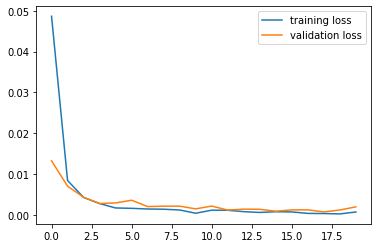

time: 216 ms (started: 2022-12-06 23:06:41 +00:00)


In [ ]:
plt.plot(running_loss_history, label="training loss")
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

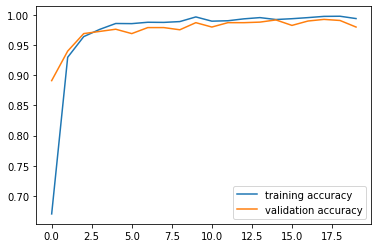

time: 150 ms (started: 2022-12-06 23:06:41 +00:00)


In [ ]:
for i in range(len(running_corrects_history)):
  running_corrects_history[i] = running_corrects_history[i].cpu()

for i in range(len(val_running_corrects_history)):
  val_running_corrects_history[i] = val_running_corrects_history[i].cpu()

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

Sample of Dataset Classification

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

time: 772 ms (started: 2022-12-06 23:06:41 +00:00)


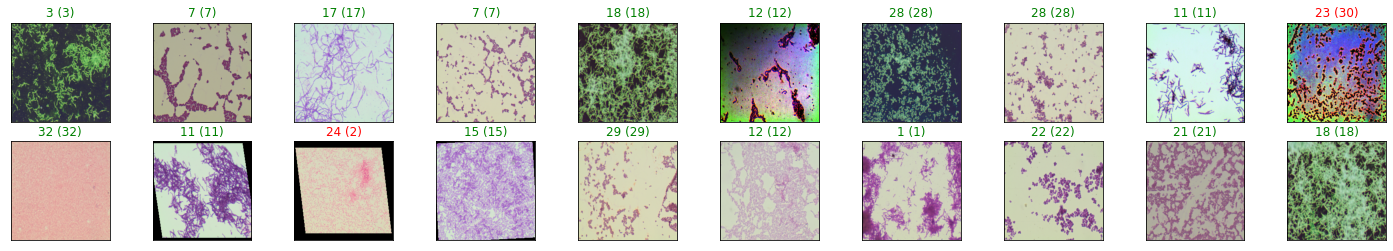

time: 1.15 s (started: 2022-12-06 23:06:42 +00:00)


In [ ]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[idx].cpu()))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

# Confusion Matrix

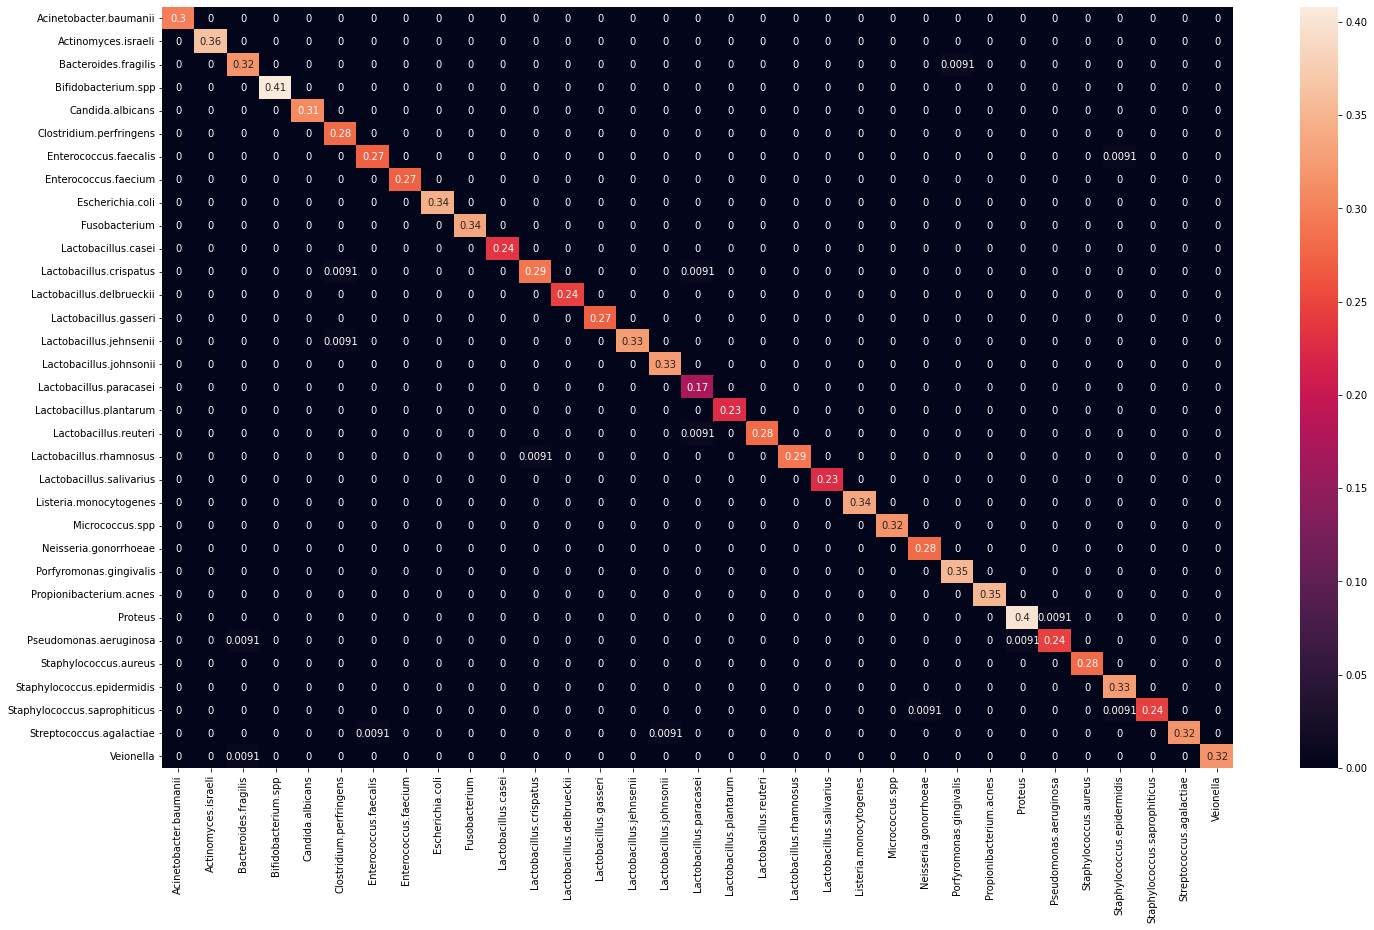

time: 34.6 s (started: 2022-12-06 23:06:43 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

test_running_corrects = 0.0

# iterate over test data
for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)

        test_loss = criterion(output, labels)
        test_score, test_preds = torch.max(output, 1)
        test_running_corrects += torch.sum(test_preds == labels.data)

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (24,14))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [2]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, average = "weighted")

(0.9906433954983199, 0.990064725294651, 0.9899640809721448, None)time: 11.3 ms (started: 2022-12-06 23:07:18 +00:00)


In [ ]:
test_epoch_acc = test_running_corrects.float()/len(test_loader.dataset)
print("test acc: {:.6f}".format(test_epoch_acc.item()))

test acc: 0.990492
time: 791 µs (started: 2022-12-06 23:07:18 +00:00)
